# **Breast Cancer Wisconsin (Diagnostic) DataSet**

El conjunto de datos contiene características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (FNA) de una masa mamaria.Se calculan diez características de valor real para cada núcleo celular:

+ **radius:** Media de las distancias desde el centro hasta los puntos del perímetro.
+ **texture:** Desviación estándar de los valores de la escala de grises.
+ **perimeter:** Perimetro.
+ **area:** Area.
+ **smoothness:** Variación local en longitudes de radio.
+ **compactness:** perimeter^2/area-1.0.
+ **concavity:** Severidad de las porciones cóncavas del contorno.
+ **concave points:** Número de porciones cóncavas del contorno.
+ **symmetry:** Simetria.
+ **fractal dimension:** ("aproximación de la línea costera" - 1).

Y la información del atributo:

+ **Diagnosis**: M = maligno, B = benigno

La media, el error estándar y "peor" o mayor (media de los tres valores más grandes) de estas características se calcularon para cada imagen, resultando en 30 funciones. Por ejemplo, el campo 3 es Radio medio, campo 13 es Radio SE, el campo 23 es Peor radio.

## **Lectura de los Datos**
Importamos las librerias que utilizaremos para el procesamiento de los datos.

In [1]:
from __future__ import unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functools

In [2]:
cancer='C:/Users/Alejandro/Desktop/Mineria/Proyecto/GitHub/Tareas/Regresion-Clasificacion/cancer.csv'
data=pd.read_csv(cancer)
del data['Unnamed: 32']
del data['id']
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## **Analisis Descriptivo de los Datos**
Verificamos que no tengamos datos faltantes en el dataset.

In [3]:
print('Datos Faltantes:\n', data.isna().sum())

Datos Faltantes:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


B    357
M    212
Name: diagnosis, dtype: int64


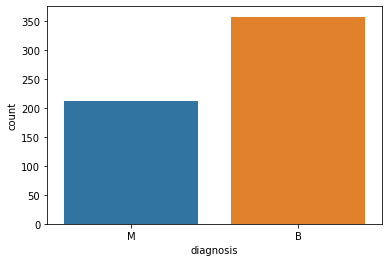

In [4]:
print(data['diagnosis'].value_counts())
sns.countplot(data=data,x='diagnosis')
plt.show()

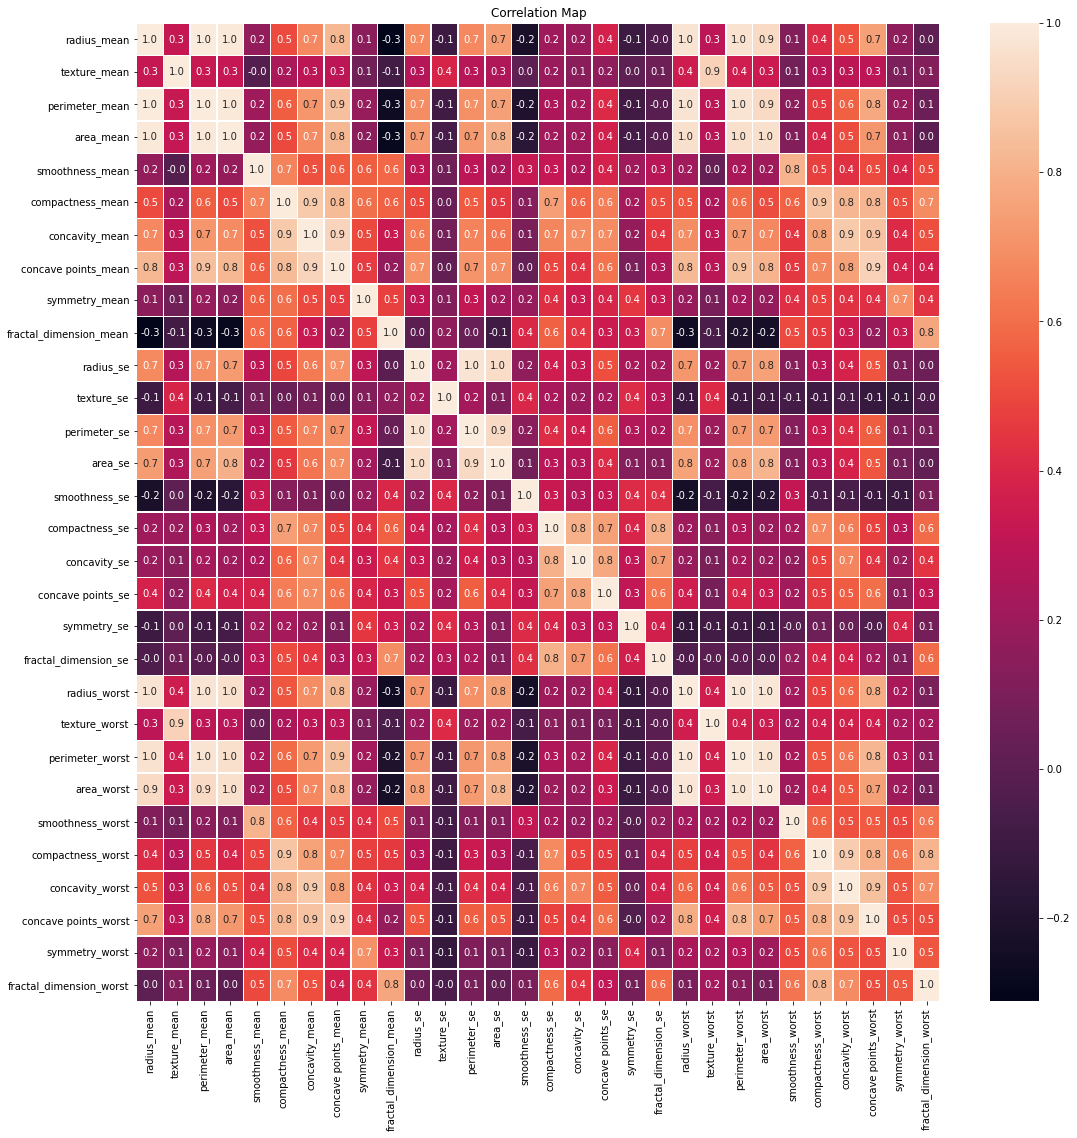

In [5]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

## **Construccion del Modelo**

Separamos los datos en la matriz de variables **x** y el vector respuesta **y**. 

In [6]:
x = data.iloc[:,1:].values # extrae como tensores numpy
y = data.iloc[:,0].values
y = LabelEncoder().fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

Normalizamos los datos tanto de entrenamiento como de validacion.

In [7]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Se elige un metodo de clasificacion donde la idea es maximizar la precision  del modelo a partir de unos hiperparametros que se escogen con el metodo de prueba y error.

In [8]:
classifier = Sequential()
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


Elegimos un nemero de 150 epocas y se toma un 20% de los datos de entrenamiento como validacion

In [9]:
ciclos=150
history = classifier.fit(x_train, y_train,
                    epochs=ciclos, 
                    validation_split = 0.2, 
                    verbose=0)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.728679,0.523227,0.665131,0.650485,0
1,0.674784,0.647922,0.623400,0.796117,1
2,0.607306,0.738386,0.569387,0.873786,2
3,0.569056,0.762836,0.496207,0.922330,3
4,0.515239,0.853301,0.418963,0.941748,4
...,...,...,...,...,...
145,0.058873,0.985330,0.021365,0.990291,145
146,0.056240,0.982885,0.021087,0.990291,146
147,0.069976,0.977995,0.020715,0.990291,147
148,0.061905,0.975550,0.019508,0.990291,148


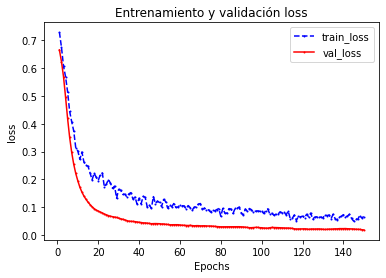

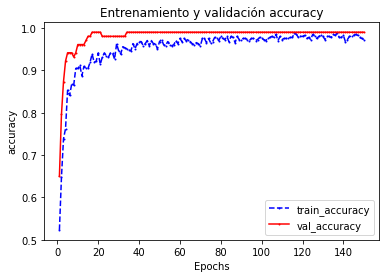

In [10]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--', markersize=1)
    plt.plot(epochs, val_metrics, 'ro-',  markersize=1)
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

Como se puede observar, los datos de entrenamiento como los de validacion tienden a cero y a uno respectivamente. Esto indica que el modelo es bastante bueno, teniendo la capacidad de evaluar correctamente casi un 100% de los datos.

## **Construccion del Modelo**

La probabilidad de evaluar en el intervalo de 0 a 1, y la forma de evaluar sera la siguiente:
+ Si el valor es mayor a 0.5, se tomara como maligno.
+ En otro caso, se tomara como benigno.

In [15]:
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

Se evalua la precision del modelo

In [12]:
mat_conf = confusion_matrix(y_test, y_pred)

In [13]:
print("Our accuracy is {}%".format(((mat_conf[0][0] + mat_conf[1][1])/y_test.shape[0])*100))

Our accuracy is 100.0%


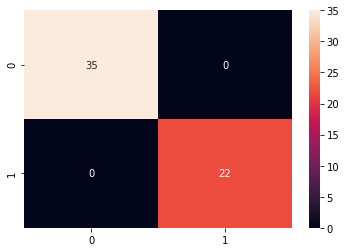

In [14]:
sns.heatmap(mat_conf,annot=True)
plt.savefig('h.png')

# **Conclusiones**

1. El modelo entrenado es muy bueno, ya que no falla en ninguno de los valores de validacion.
2. La seleccion de los hiperparametros es adecuada, pues el modelo indica una precision del 100%.
